# Intro 

In this project, we are going to do a classification project to help a finance company classify their consumers' credit score based on the consumers' credit-related information. The company has been doing this classification task manually over the years and now has decided to build an intelligent system that can do this automatically using the data that has been gathered up until this point. The management of the company asked me, a data scientist, to help building the classification models.

## Business Goal

Perform credit score classification for a finance company's consumers based on their credit-related information.

## Project Tasks

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score

### Loading the dataset

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

C:\Users\user\anaconda3\anacondaIII\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Data Understanding & Brief EDA

In [3]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [5]:
train_df.shape , test_df.shape

((100000, 28), (50000, 27))

In [6]:
train_df.drop(['ID','Customer_ID','Month','Name','SSN',
               'Type_of_Loan','Credit_History_Age']
               ,axis=1,inplace=True)

In [7]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,5,4,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

In [9]:
train_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [12]:
test_df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [13]:
size_before_cleaning = test_df.shape
test_df = test_df[test_df.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - test_df.shape[0]))

772 Records dropped


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49228 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        49228 non-null  object 
 1   Customer_ID               49228 non-null  object 
 2   Month                     49228 non-null  object 
 3   Name                      44611 non-null  object 
 4   Age                       49228 non-null  object 
 5   SSN                       49228 non-null  object 
 6   Occupation                49228 non-null  object 
 7   Annual_Income             49228 non-null  object 
 8   Monthly_Inhand_Salary     42248 non-null  float64
 9   Num_Bank_Accounts         49228 non-null  int64  
 10  Num_Credit_Card           49228 non-null  int64  
 11  Interest_Rate             49228 non-null  int64  
 12  Num_of_Loan               49228 non-null  object 
 13  Type_of_Loan              43931 non-null  object 
 14  Delay_

In [15]:
test_df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        4617
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       6980
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5297
Delay_from_due_date            0
Num_of_Delayed_Payment      3183
Changed_Credit_Limit           0
Num_Credit_Inquiries         930
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4104
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2033
Payment_Behaviour              0
Monthly_Balance              520
dtype: int64

### Data Cleaning

In [16]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [17]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [18]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [19]:
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].apply(Amount_invested_monthly)
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].astype("float")

In [20]:
train_df["Changed_Credit_Limit"]=train_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
train_df.drop(train_df[train_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
train_df["Changed_Credit_Limit"]=train_df["Changed_Credit_Limit"].astype("float")

In [21]:
train_df.drop(train_df[train_df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    train_df[i] = train_df[i].apply(filter_general)
    train_df[i] = train_df[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [22]:
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].astype(np.float64)

In [23]:
train_df['Occupation'] = train_df['Occupation'].replace('_______', np.nan)
train_df['Occupation'] = train_df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [24]:
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace('_', np.nan)
train_df['Credit_Mix'] = train_df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [25]:
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace('NM', np.nan)
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [26]:
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].replace('!@9#%8', np.nan)
train_df['Payment_Behaviour'] = train_df['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

In [27]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    train_df[i].fillna(train_df[i].median(), inplace=True)

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97900 non-null  float64
 1   Occupation                97900 non-null  object 
 2   Annual_Income             97900 non-null  float64
 3   Monthly_Inhand_Salary     97900 non-null  float64
 4   Num_Bank_Accounts         97900 non-null  int64  
 5   Num_Credit_Card           97900 non-null  int64  
 6   Interest_Rate             97900 non-null  int64  
 7   Num_of_Loan               97900 non-null  float64
 8   Delay_from_due_date       97900 non-null  int64  
 9   Num_of_Delayed_Payment    97900 non-null  float64
 10  Changed_Credit_Limit      97900 non-null  float64
 11  Num_Credit_Inquiries      97900 non-null  float64
 12  Credit_Mix                97900 non-null  object 
 13  Outstanding_Debt          97900 non-null  float64
 14  Credit

In [29]:
train_df.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             1182
Credit_Score                   0
dtype: int64

In [30]:
train_df['Monthly_Balance'].fillna(train_df['Monthly_Balance'].median(), inplace=True)

In [31]:
train_df.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [32]:
train_df.shape, test_df.shape

((97900, 21), (49228, 27))

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97900 non-null  float64
 1   Occupation                97900 non-null  object 
 2   Annual_Income             97900 non-null  float64
 3   Monthly_Inhand_Salary     97900 non-null  float64
 4   Num_Bank_Accounts         97900 non-null  int64  
 5   Num_Credit_Card           97900 non-null  int64  
 6   Interest_Rate             97900 non-null  int64  
 7   Num_of_Loan               97900 non-null  float64
 8   Delay_from_due_date       97900 non-null  int64  
 9   Num_of_Delayed_Payment    97900 non-null  float64
 10  Changed_Credit_Limit      97900 non-null  float64
 11  Num_Credit_Inquiries      97900 non-null  float64
 12  Credit_Mix                97900 non-null  object 
 13  Outstanding_Debt          97900 non-null  float64
 14  Credit

### Data Visualization 

In [34]:
train_corr = train_df.corr()
train_corr

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,-0.001348,0.002518,0.001444,-0.002546,-0.005176,-0.000464,-0.009276,-0.001354,-0.003305,-0.002061,-0.001958,0.003124,0.000552,0.003644,0.006285
Annual_Income,-0.001348,1.000000,0.027714,-0.004493,0.001549,-0.002664,0.001385,-0.010807,0.001249,0.000727,0.002710,-0.003492,0.010386,-0.000851,-0.004793,0.019194
Monthly_Inhand_Salary,0.002518,0.027714,1.000000,-0.010198,-0.004538,-0.005598,-0.009799,-0.227550,0.001390,-0.159622,-0.007907,-0.245698,0.157406,0.006366,0.055104,0.628086
Num_Bank_Accounts,0.001444,-0.004493,-0.010198,1.000000,-0.002023,-0.003775,-0.001756,0.015756,-0.003451,0.007827,-0.001472,0.016289,-0.002485,-0.001500,0.002511,-0.008355
Num_Credit_Card,-0.002546,0.001549,-0.004538,-0.002023,1.000000,-0.005432,0.000313,0.008803,0.004788,0.005242,-0.003301,0.006483,-0.003727,0.000310,-0.001715,-0.005634
Interest_Rate,-0.005176,-0.002664,-0.005598,-0.003775,-0.005432,1.000000,0.001615,0.010155,0.002931,0.000957,-0.001609,0.010659,0.000300,0.002326,-0.002011,-0.007122
Num_of_Loan,-0.000464,0.001385,-0.009799,-0.001756,0.000313,0.001615,1.000000,0.012275,0.007648,0.013654,0.000014,0.022217,-0.006381,-0.000599,0.001237,-0.018268
Delay_from_due_date,-0.009276,-0.010807,-0.227550,0.015756,0.008803,0.010155,0.012275,1.000000,0.011958,0.296811,0.010966,0.571734,-0.062654,-0.003584,-0.012052,-0.277154
Num_of_Delayed_Payment,-0.001354,0.001249,0.001390,-0.003451,0.004788,0.002931,0.007648,0.011958,1.000000,0.007413,0.002788,0.009480,0.000749,0.001326,0.001699,-0.002324
Changed_Credit_Limit,-0.003305,0.000727,-0.159622,0.007827,0.005242,0.000957,0.013654,0.296811,0.007413,1.000000,0.007268,0.464017,-0.048722,-0.001835,-0.011452,-0.204075


<AxesSubplot:>

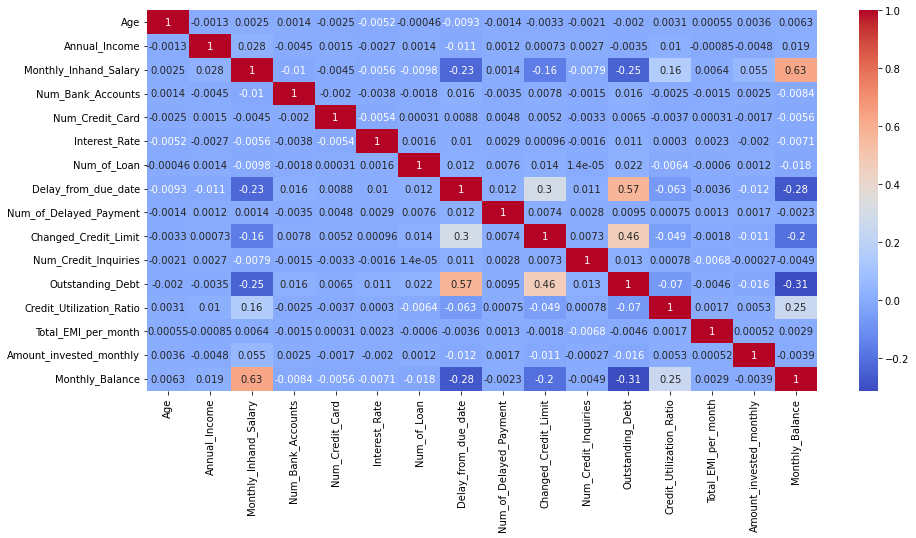

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(train_corr, annot = True, cmap = 'coolwarm')

In [ ]:
#train_df.hist(bins=200,figsize=[20,10])

In [38]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

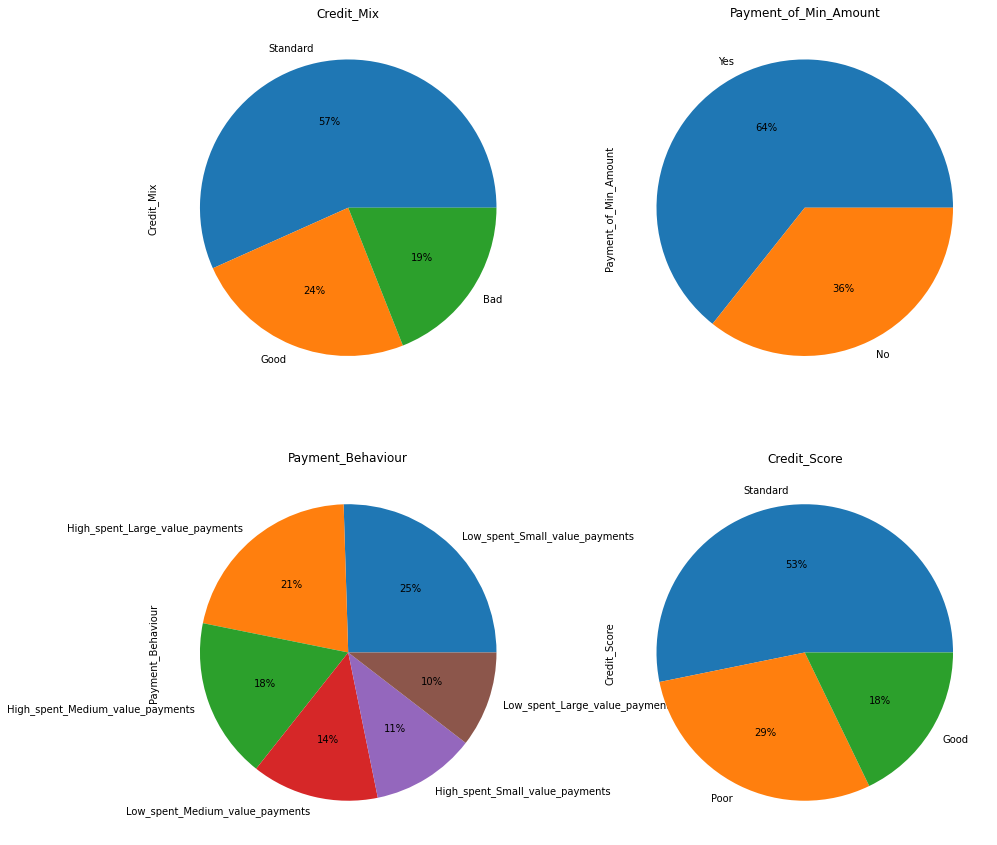

In [39]:
pie_plot(train_df, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

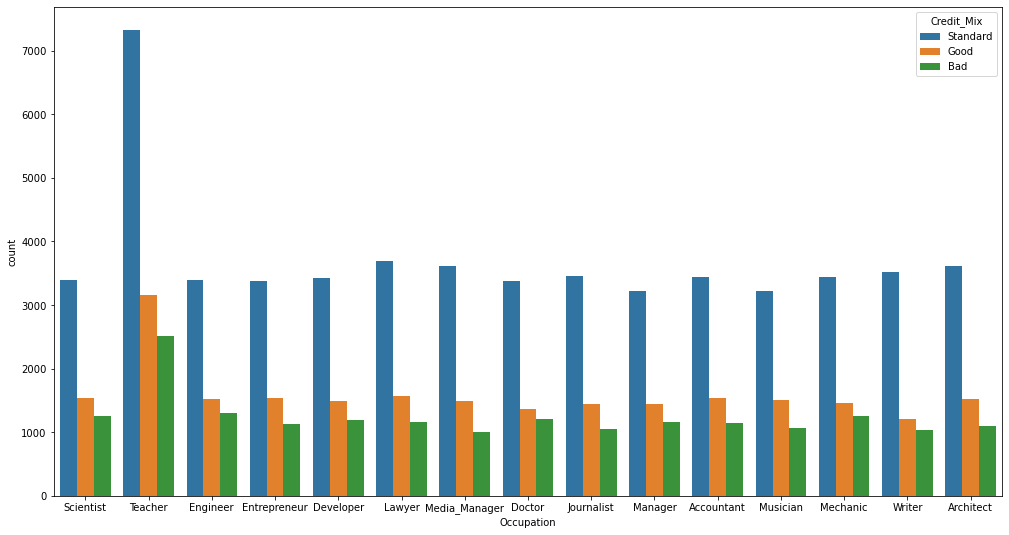

In [40]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=train_df,x="Occupation",hue="Credit_Mix")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

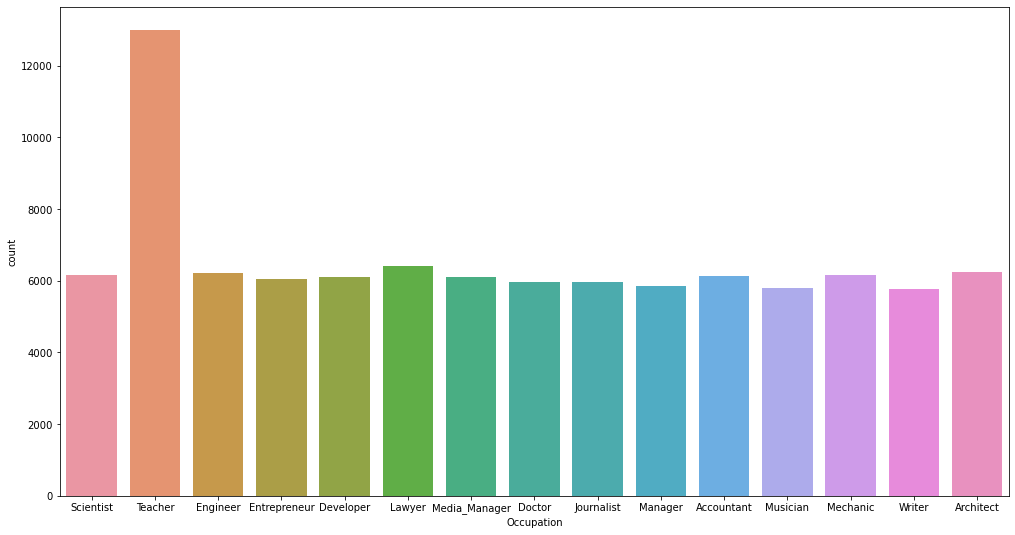

In [41]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data = train_df, x = "Occupation")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

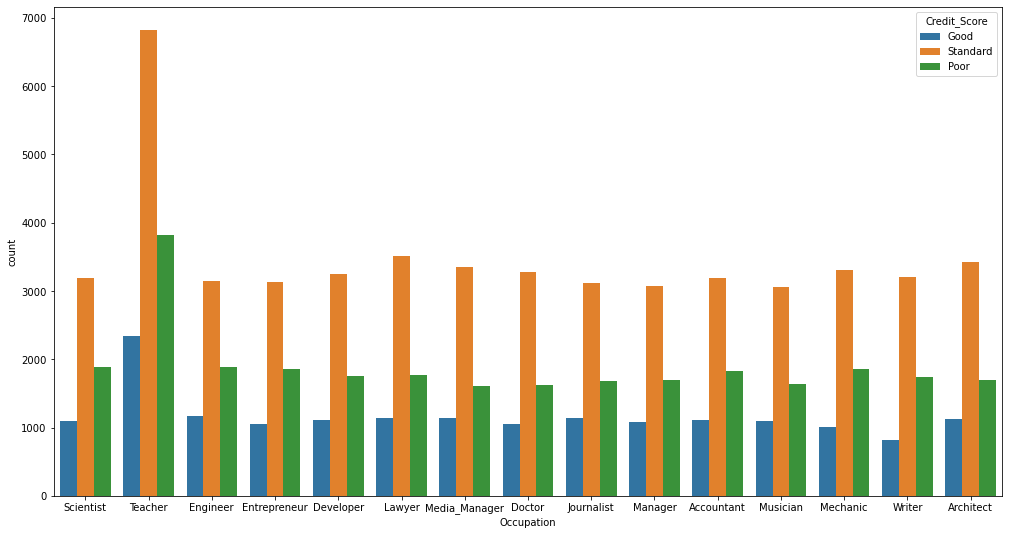

In [42]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=train_df,x="Occupation",hue="Credit_Score")

In [43]:
numeric_cols = train_df.select_dtypes(exclude = "object").columns
cat_cols = test_df.select_dtypes(include = "object").columns
numeric_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [44]:
cat_cols

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#vif_df = train_df[numeric_cols]

#vif_data = pd.DataFrame()
#vif_data["feature"] = vif_df.columns
#vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
#vif_data.head(17)

In [ ]:
#def box_plot(train_df, num_cols):
#    plt.figure(figsize=(20, 15))
#    for i in range(len(num_cols)):
#        if i == 16:
#            break
#        else:
#            plt.subplot(4,4, i+1)
#            l = num_cols[i]
#            sns.boxplot(train_df[l], palette="flare")

In [ ]:
#box_plot(data = train_df, num_cols)

### Label Encoding

In [45]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp

In [46]:
train_df[numeric_cols] = RobustScaling(train_df[numeric_cols], numeric_cols)

In [47]:
train_df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,...,-0.333333,Standard,-0.258117,-0.648868,No,-0.150195,-0.311222,High_spent_Small_value_payments,-0.122904,Good
1,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,...,-0.333333,Good,-0.258117,-0.042096,No,-0.150195,-0.098445,Low_spent_Large_value_payments,-0.264738,Good
3,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,...,-0.333333,Good,-0.258117,-0.888774,No,-0.150195,-0.530350,Low_spent_Small_value_payments,0.024683,Good
4,-0.647059,Scientist,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,...,-0.333333,Good,-0.258117,-0.596790,No,-0.150195,-0.412287,High_spent_Medium_value_payments,0.019542,Good
5,-0.647059,Scientist,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,...,-0.333333,Good,-0.258117,-1.156456,No,-0.150195,0.239076,High_spent_Large_value_payments,-0.468666,Good


In [48]:
train_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
train_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
train_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
train_df = pd.get_dummies(train_df, columns = ['Occupation', 'Payment_Behaviour'])

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 95839 non-null  float64
 1   Annual_Income                                       95839 non-null  float64
 2   Monthly_Inhand_Salary                               95839 non-null  float64
 3   Num_Bank_Accounts                                   95839 non-null  float64
 4   Num_Credit_Card                                     95839 non-null  float64
 5   Interest_Rate                                       95839 non-null  float64
 6   Num_of_Loan                                         95839 non-null  float64
 7   Delay_from_due_date                                 95839 non-null  float64
 8   Num_of_Delayed_Payment                              95839 non-null  float64


In [50]:
train_df.isnull().sum()

Age                                                   2061
Annual_Income                                         2061
Monthly_Inhand_Salary                                 2061
Num_Bank_Accounts                                     2061
Num_Credit_Card                                       2061
Interest_Rate                                         2061
Num_of_Loan                                           2061
Delay_from_due_date                                   2061
Num_of_Delayed_Payment                                2061
Changed_Credit_Limit                                  2061
Num_Credit_Inquiries                                  2061
Credit_Mix                                               0
Outstanding_Debt                                      2061
Credit_Utilization_Ratio                              2061
Payment_of_Min_Amount                                    0
Total_EMI_per_month                                   2061
Amount_invested_monthly                               20

In [51]:
for i in numeric_cols:
    train_df[i].fillna(method='ffill', inplace=True)

In [52]:
train_df.head(20)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196429,...,0,1,0,0,0,0,1,0,0,0
1,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,0.196429,...,0,1,0,0,0,0,0,1,0,0
3,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,0.196429,...,0,1,0,0,0,0,0,0,0,1
4,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,-0.013655,...,0,1,0,0,0,1,0,0,0,0
5,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,0.196429,...,0,1,0,0,1,0,0,0,0,0
6,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.888889,0.196429,...,0,1,0,0,0,0,0,0,0,1
7,-0.352941,-0.051123,-0.014885,-1.00,-0.333333,-0.583333,-0.50,-0.833333,-1.111111,-0.418067,...,0,1,0,0,0,1,0,0,0,0
8,-0.352941,-0.051123,-0.014885,-1.00,-0.333333,-0.583333,-0.50,-0.611111,-1.444444,-0.207983,...,0,0,1,0,0,0,0,0,0,1
9,-0.352941,-0.051123,-0.014885,-1.00,460.000000,-0.583333,-0.50,-0.833333,-1.666667,-0.418067,...,0,0,1,0,1,0,0,0,0,0
10,-0.352941,-0.051123,0.000000,-1.00,-0.333333,-0.583333,-0.50,-0.833333,-1.222222,-0.418067,...,0,0,1,0,1,0,0,0,0,0


In [53]:
train_df.isnull().sum()

Age                                                   0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Credit_Mix                                            0
Outstanding_Debt                                      0
Credit_Utilization_Ratio                              0
Payment_of_Min_Amount                                 0
Total_EMI_per_month                                   0
Amount_invested_monthly                               0
Monthly_Balance                                 

In [54]:
train_df['Payment_of_Min_Amount'].tail(20)

99980    0
99981    1
99982    0
99983    0
99984    1
99985    1
99986    1
99987    1
99988    1
99989    1
99990    1
99991    1
99992    0
99993    0
99994    0
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Payment_of_Min_Amount, dtype: int64

In [55]:
train_df['Payment_of_Min_Amount'].replace({"NM":0}, inplace=True)

In [56]:
train_df['Payment_of_Min_Amount'].tail(20)

99980    0
99981    1
99982    0
99983    0
99984    1
99985    1
99986    1
99987    1
99988    1
99989    1
99990    1
99991    1
99992    0
99993    0
99994    0
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Payment_of_Min_Amount, dtype: int64

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 97900 non-null  float64
 1   Annual_Income                                       97900 non-null  float64
 2   Monthly_Inhand_Salary                               97900 non-null  float64
 3   Num_Bank_Accounts                                   97900 non-null  float64
 4   Num_Credit_Card                                     97900 non-null  float64
 5   Interest_Rate                                       97900 non-null  float64
 6   Num_of_Loan                                         97900 non-null  float64
 7   Delay_from_due_date                                 97900 non-null  float64
 8   Num_of_Delayed_Payment                              97900 non-null  float64


In [58]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train_df['Credit_Score'] = le.fit_transform(train_df['Credit_Score'])

#Separate training features from target
X_train = train_df.drop(['Credit_Score'], axis=1)
y_train = train_df['Credit_Score']

y_train.head()

0    2
1    2
3    2
4    2
5    2
Name: Credit_Score, dtype: int64

In [59]:
X_train.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       '

In [60]:
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196429,...,0,1,0,0,0,0,1,0,0,0
1,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,0.196429,...,0,1,0,0,0,0,0,1,0,0
3,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,0.196429,...,0,1,0,0,0,0,0,0,0,1
4,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,-0.013655,...,0,1,0,0,0,1,0,0,0,0
5,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,0.196429,...,0,1,0,0,1,0,0,0,0,0


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97900 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 97900 non-null  float64
 1   Annual_Income                                       97900 non-null  float64
 2   Monthly_Inhand_Salary                               97900 non-null  float64
 3   Num_Bank_Accounts                                   97900 non-null  float64
 4   Num_Credit_Card                                     97900 non-null  float64
 5   Interest_Rate                                       97900 non-null  float64
 6   Num_of_Loan                                         97900 non-null  float64
 7   Delay_from_due_date                                 97900 non-null  float64
 8   Num_of_Delayed_Payment                              97900 non-null  float64


In [62]:
# Convert the following numerical labels from interger to float
float_array = X_train[["Credit_Mix", "Payment_of_Min_Amount", "Occupation_Accountant", "Occupation_Architect", "Occupation_Developer", 
                           "Occupation_Doctor","Occupation_Engineer", "Occupation_Entrepreneur","Occupation_Journalist", "Occupation_Lawyer", "Occupation_Manager", "Occupation_Mechanic", "Occupation_Media_Manager", "Occupation_Musician",
                              "Occupation_Scientist", "Occupation_Teacher", "Occupation_Writer", "Payment_Behaviour_High_spent_Large_value_payments", "Payment_Behaviour_High_spent_Medium_value_payments", "Payment_Behaviour_High_spent_Small_value_payments",
                              "Payment_Behaviour_Low_spent_Large_value_payments", "Payment_Behaviour_Low_spent_Medium_value_payments", "Payment_Behaviour_Low_spent_Small_value_payments"]].values.astype(float)
    
# categorical features to be onverted to One Hot Encoding
#categ = ["bank_account_type",
#        "bank_name_clients", "employment_status_clients"]
    
# One Hot Encoding conversion
#X_train = pd.get_dummies(X_train, prefix_sep="_", columns=categ)
    
    
# drop uniquid column
#X_train = X_train.drop(["customerid", "bank_branch_clients","referredby_x", "referredby_y",
#                        "creationdate_x", "creationdate_y", "closeddate", "firstduedate", "firstrepaiddate","approveddate_x","approveddate_y", "birthdate", "level_of_education_clients"], axis=1)
X_train.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196429,...,0,1,0,0,0,0,1,0,0,0
1,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-1.055556,0.000000,0.196429,...,0,1,0,0,0,0,0,1,0,0
3,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.666667,0.000000,0.196429,...,0,1,0,0,0,0,0,0,0,1
4,-0.647059,-0.346184,0.000000,-0.75,-0.333333,-0.833333,0.25,-0.555556,-1.111111,-0.013655,...,0,1,0,0,0,1,0,0,0,0
5,-0.647059,-0.346184,-0.353833,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.666667,0.196429,...,0,1,0,0,1,0,0,0,0,0


In [63]:
X_train['Payment_of_Min_Amount'].head(20)

0     0
1     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    0
19    0
20    0
Name: Payment_of_Min_Amount, dtype: int64

In [64]:
X_train['Payment_of_Min_Amount'].tail(20)

99980    0
99981    1
99982    0
99983    0
99984    1
99985    1
99986    1
99987    1
99988    1
99989    1
99990    1
99991    1
99992    0
99993    0
99994    0
99995    0
99996    0
99997    0
99998    0
99999    0
Name: Payment_of_Min_Amount, dtype: int64

In [65]:
# scale our data into range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)

In [66]:
X_train

array([[1.03638876e-03, 5.00523415e-04, 1.02087051e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03638876e-03, 5.00523415e-04, 1.87075879e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.03638876e-03, 5.00523415e-04, 1.02087051e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.26669737e-03, 1.34855874e-03, 2.05071666e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26669737e-03, 1.34855874e-03, 2.05071666e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26669737e-03, 1.34855874e-03, 2.05071666e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [67]:
X_train.shape

(97900, 39)

### Train_Test_Split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=17)

### Modelling

In [69]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training sets
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([2, 1, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
#Evaluate the model's accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6568855046893862


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

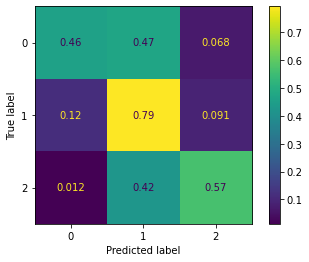

In [72]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(rf_classifier,X_test, y_test,normalize='true')

In [ ]:
Credit_Score = pd.DataFrame(train_df['Credit_Score'])
Credit_Score.head()

### Test Dataset

In [73]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [74]:
#test_df = test_df.join(Credit_Score)
test_df.count()

ID                          49228
Customer_ID                 49228
Month                       49228
Name                        44611
Age                         49228
SSN                         49228
Occupation                  49228
Annual_Income               49228
Monthly_Inhand_Salary       42248
Num_Bank_Accounts           49228
Num_Credit_Card             49228
Interest_Rate               49228
Num_of_Loan                 49228
Type_of_Loan                43931
Delay_from_due_date         49228
Num_of_Delayed_Payment      46045
Changed_Credit_Limit        49228
Num_Credit_Inquiries        48298
Credit_Mix                  49228
Outstanding_Debt            49228
Credit_Utilization_Ratio    49228
Credit_History_Age          45124
Payment_of_Min_Amount       49228
Total_EMI_per_month         49228
Amount_invested_monthly     47195
Payment_Behaviour           49228
Monthly_Balance             48708
dtype: int64

In [75]:
test_df.drop(['ID','Customer_ID','Month','Name','SSN',
               'Type_of_Loan','Credit_History_Age']
               ,axis=1,inplace=True)

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49228 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       49228 non-null  object 
 1   Occupation                49228 non-null  object 
 2   Annual_Income             49228 non-null  object 
 3   Monthly_Inhand_Salary     42248 non-null  float64
 4   Num_Bank_Accounts         49228 non-null  int64  
 5   Num_Credit_Card           49228 non-null  int64  
 6   Interest_Rate             49228 non-null  int64  
 7   Num_of_Loan               49228 non-null  object 
 8   Delay_from_due_date       49228 non-null  int64  
 9   Num_of_Delayed_Payment    46045 non-null  object 
 10  Changed_Credit_Limit      49228 non-null  object 
 11  Num_Credit_Inquiries      48298 non-null  float64
 12  Credit_Mix                49228 non-null  object 
 13  Outstanding_Debt          49228 non-null  object 
 14  Credit

In [77]:
test_df["Amount_invested_monthly"]=test_df["Amount_invested_monthly"].apply(Amount_invested_monthly)
test_df["Amount_invested_monthly"]=test_df["Amount_invested_monthly"].astype("float")

In [78]:
test_df["Changed_Credit_Limit"]=test_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
test_df.drop(test_df[test_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
test_df["Changed_Credit_Limit"]=test_df["Changed_Credit_Limit"].astype("float")

In [79]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [80]:
test_df.drop(test_df[test_df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    test_df[i] = test_df[i].apply(filter_general)
    test_df[i] = test_df[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [81]:
test_df['Credit_Mix'] = test_df['Credit_Mix'].replace('_', np.nan)
test_df['Credit_Mix'] = test_df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [82]:
test_df['Num_of_Delayed_Payment'] = test_df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
test_df['Num_of_Delayed_Payment'] = test_df['Num_of_Delayed_Payment'].astype(np.float64)

In [83]:
test_df['Occupation'] = test_df['Occupation'].replace('_______', np.nan)
test_df['Occupation'] = test_df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [84]:
#test_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
test_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
test_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
test_df = pd.get_dummies(test_df, columns = ['Occupation', 'Payment_Behaviour'])

In [85]:
test_df['Payment_of_Min_Amount'].replace({"NM":0}, inplace=True)

In [86]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    test_df[i].fillna(train_df[i].median(), inplace=True)

In [87]:
test_df.isnull().sum()

Age                                                     0
Annual_Income                                           0
Monthly_Inhand_Salary                                   0
Num_Bank_Accounts                                       0
Num_Credit_Card                                         0
Interest_Rate                                           0
Num_of_Loan                                             0
Delay_from_due_date                                     0
Num_of_Delayed_Payment                                  0
Changed_Credit_Limit                                    0
Num_Credit_Inquiries                                    0
Credit_Mix                                              0
Outstanding_Debt                                        0
Credit_Utilization_Ratio                                0
Payment_of_Min_Amount                                   0
Total_EMI_per_month                                     0
Amount_invested_monthly                                 0
Monthly_Balanc

In [88]:
# Convert the following numerical labels from interger to float
float_array = test_df[["Credit_Mix", "Occupation_Accountant", "Occupation_Architect", "Occupation_Developer", 
                           "Occupation_Doctor","Occupation_Engineer", "Occupation_Entrepreneur","Occupation_Journalist", "Occupation_Lawyer", "Occupation_Manager", "Occupation_Mechanic", "Occupation_Media_Manager", "Occupation_Musician",
                              "Occupation_Scientist", "Occupation_Teacher", "Occupation_Writer", "Payment_Behaviour_High_spent_Large_value_payments", "Payment_Behaviour_High_spent_Medium_value_payments", "Payment_Behaviour_High_spent_Small_value_payments",
                              "Payment_Behaviour_Low_spent_Large_value_payments", "Payment_Behaviour_Low_spent_Medium_value_payments", "Payment_Behaviour_Low_spent_Small_value_payments"]].values.astype(float)
    
# categorical features to be onverted to One Hot Encoding
#categ = ["bank_account_type",
#        "bank_name_clients", "employment_status_clients"]
    
# One Hot Encoding conversion
#X_train = pd.get_dummies(X_train, prefix_sep="_", columns=categ)
    
    
# drop uniquid column
test_df = test_df.drop(["Payment_Behaviour_!@9#%8"], axis = 1)
#                        "creationdate_x", "creationdate_y", "closeddate", "firstduedate", "firstrepaiddate","approveddate_x","approveddate_y", "birthdate", "level_of_education_clients"], axis=1)
#test_df.head()

In [89]:
# scale our data into range of 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
test_df = scaler.fit_transform(test_df)

In [90]:
test_df

array([[1.03758358e-03, 5.01784709e-04, 1.20018898e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.15287065e-03, 5.01784709e-04, 1.20018898e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15287065e-03, 5.01784709e-04, 1.20018898e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.26815771e-03, 1.35195704e-03, 2.20946850e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26815771e-03, 1.35195704e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26815771e-03, 1.35195704e-03, 2.20946850e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [91]:
test_df = test_df[np.isfinite(test_df).all(1)]

In [92]:
# Get the predicted result for the test Data
predictions = rf_classifier.predict(test_df)

In [93]:
predictions.shape

(47666,)

In [94]:
test_1 = pd.read_csv('test.csv')

In [95]:
test_1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [96]:
test_1.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [97]:
test_1.shape

(50000, 27)

In [98]:
test_1['predictions'] = pd.Series(predictions)

In [99]:
test_1['predictions'].tail()

49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: predictions, dtype: float64

In [100]:
test_1['predictions'].fillna(0, inplace = True)

In [101]:
test_1['predictions'].tail()

49995    0.0
49996    0.0
49997    0.0
49998    0.0
49999    0.0
Name: predictions, dtype: float64

In [102]:
test_pred = test_1['predictions'].apply(np.int64)

In [103]:
# Create submission DataFrame
submission = pd.DataFrame({"Customer_ID": test_1["Customer_ID"] + " x " + test_1["Name"],
                           "Credit_Score": test_pred})

In [104]:
submission.head()

,Customer_ID,Credit_Score
0,CUS_0xd40 x Aaron Maashoh,1
1,CUS_0xd40 x Aaron Maashoh,2
2,CUS_0xd40 x Aaron Maashoh,2
3,CUS_0xd40 x Aaron Maashoh,2
4,CUS_0x21b1 x Rick Rothackerj,2


In [105]:
submission.tail()

,Customer_ID,Credit_Score
49995,CUS_0x8600 x Sarah McBridec,0
49996,CUS_0x942c x Nicks,0
49997,CUS_0x942c x Nicks,0
49998,CUS_0x942c x Nicks,0
49999,CUS_0x942c x Nicks,0


In [106]:
submission.to_csv('second_submission.csv', index = False)